In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from models import ols_regression, manhattan_linear, gc

2024-10-23 14:35:25.837446: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-23 14:35:25.838434: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 14:35:25.841372: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 14:35:25.849940: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 14:35:25.864813: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [4]:
def min_max_scaling(X,min_val,max_val):
    X = np.array(X)
    X_min = np.min(X)
    X_max = np.max(X)
    
    # If the column has constant values (min == max), return the original values unscaled
    if X_min == X_max:
        return X
    
    # Perform scaling if min != max
    X_scaled = (X - X_min) / (X_max - X_min) * (max_val - min_val) + min_val

    
    return X_scaled

In [5]:
nr_people_pop1 = 50
nr_people_pop2 = 10
nr_people_pop3 = 10

total_humans = nr_people_pop1+ nr_people_pop2  + nr_people_pop3
minaf_pop1 = 0.8
minaf_pop2 = 0
minaf_pop3 = 0

majaf_pop1 = 0.1
majaf_pop2 = 0.7
majaf_pop3 = 0.2


hetaf_pop1 = np.round(1 - minaf_pop1 - majaf_pop1,1)
hetaf_pop2 = np.round(1 - minaf_pop2 - majaf_pop2,1)
hetaf_pop3 = np.round(1 - minaf_pop3 - majaf_pop3,1)

pheno_pop1 = 1
pheno_pop2 = -1
pheno_pop3 = 20

In [6]:
hetaf_pop2

0.3

In [7]:
# make snp
pop1_snps = [-1]*int(nr_people_pop1*minaf_pop1) + [0]*int(nr_people_pop1*hetaf_pop1) + [1]*int(nr_people_pop1*majaf_pop1)
pop2_snps = [-1]*int(nr_people_pop2*minaf_pop2) + [0]*int(nr_people_pop2*hetaf_pop2) + [1]*int(nr_people_pop2*majaf_pop2)
pop3_snps = [-1]*int(nr_people_pop3*minaf_pop3) + [0]*int(nr_people_pop3*hetaf_pop3) + [1]*int(nr_people_pop3*majaf_pop3)
nr_pop1_snps = [int(nr_people_pop1*minaf_pop1)]*int(nr_people_pop1*minaf_pop1) + [int(nr_people_pop1*hetaf_pop1)]*int(nr_people_pop1*hetaf_pop1) + [int(nr_people_pop1*majaf_pop1)]*int(nr_people_pop1*majaf_pop1)
nr_pop2_snps = [int(nr_people_pop2*minaf_pop2)]*int(nr_people_pop2*minaf_pop2) + [int(nr_people_pop2*hetaf_pop2)]*int(nr_people_pop2*hetaf_pop2) + [int(nr_people_pop2*majaf_pop2)]*int(nr_people_pop2*majaf_pop2)
nr_pop3_snps = [int(nr_people_pop3*minaf_pop3)]*int(nr_people_pop3*minaf_pop3) + [int(nr_people_pop3*hetaf_pop3)]*int(nr_people_pop3*hetaf_pop3) + [int(nr_people_pop3*majaf_pop3)]*int(nr_people_pop3*majaf_pop3)

snps = pop1_snps + pop2_snps + pop3_snps
snps_nr = nr_pop1_snps + nr_pop2_snps + nr_pop3_snps


In [8]:
minaf = [minaf_pop1]*nr_people_pop1 + [minaf_pop2]*nr_people_pop2 + [minaf_pop3]*nr_people_pop3
hetaf = [hetaf_pop1]*nr_people_pop1 + [hetaf_pop2]*nr_people_pop2 + [hetaf_pop3]*nr_people_pop3
majaf = [majaf_pop1]*nr_people_pop1 + [majaf_pop2]*nr_people_pop2 + [majaf_pop3]*nr_people_pop3

In [9]:
pop = ['pop1']*nr_people_pop1 + ['pop2']*nr_people_pop2 +  ['pop3']*nr_people_pop3
pop_nr = [nr_people_pop1]*nr_people_pop1 + [nr_people_pop2]*nr_people_pop2 +  [nr_people_pop3]*nr_people_pop3
risk = [pheno_pop1]*nr_people_pop1 + [pheno_pop2]*nr_people_pop2 +  [pheno_pop3]*nr_people_pop3

In [10]:
humans = pd.DataFrame()
humans['snp'] = snps
humans = pd.get_dummies(humans, columns=['snp'], dtype=int)
humans['snp'] = snps
humans['snp_nr'] = snps_nr
humans['snp_nr'] = humans['snp_nr']/humans['snp_nr'].max()

humans['minaf'] = minaf
humans['hetaf'] = hetaf
humans['majaf'] = majaf
humans['pop'] = pop
humans['pop_quantity'] = pop_nr
humans['env_risk'] = risk
#humans['risk'] = min_max_scaling(humans['risk'],-1,1)
#humans['risk'] = (humans['risk'] - humans['risk'].mean()) / humans['risk'].std()

In [11]:
count_total_AFs = humans[['snp']].apply(pd.Series.value_counts)/len(humans)
total_minor = count_total_AFs.loc[-1].snp
total_het = count_total_AFs.loc[0].snp
total_major = count_total_AFs.loc[1].snp

In [12]:
humans

,snp_-1,snp_0,snp_1,snp,snp_nr,minaf,hetaf,majaf,pop,pop_quantity,env_risk
0,1,0,0,-1,1.00,0.8,0.1,0.1,pop1,50,1
1,1,0,0,-1,1.00,0.8,0.1,0.1,pop1,50,1
2,1,0,0,-1,1.00,0.8,0.1,0.1,pop1,50,1
3,1,0,0,-1,1.00,0.8,0.1,0.1,pop1,50,1
4,1,0,0,-1,1.00,0.8,0.1,0.1,pop1,50,1
...,...,...,...,...,...,...,...,...,...,...,...
65,0,1,0,0,0.20,0.0,0.8,0.2,pop3,10,20
66,0,1,0,0,0.20,0.0,0.8,0.2,pop3,10,20
67,0,1,0,0,0.20,0.0,0.8,0.2,pop3,10,20
68,0,0,1,1,0.05,0.0,0.8,0.2,pop3,10,20


In [13]:
pheno_pop1 = humans[humans['pop']=='pop1']['env_risk'].mean()
pheno_pop2 = humans[humans['pop']=='pop2']['env_risk'].mean()
pheno_pop3 = humans[humans['pop']=='pop3']['env_risk'].mean()

In [14]:
humans['env_risk'] = humans['env_risk']-humans['env_risk'].mean()

# No correction

In [15]:
X = humans[['snp']]  # Predictor variable
y = humans['env_risk']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_env_risk'] = model.predict(X)

1.9652061855670104


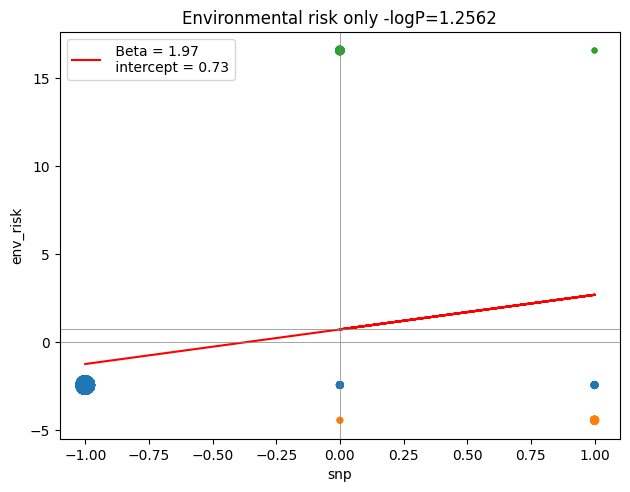

In [16]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp', y='env_risk', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp'], humans['predicted_env_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

# correction

# X-X_mean

In [17]:
humans['snp_mean'] = humans['majaf'] - humans['minaf']

In [18]:
humans['snp_shifted'] = humans['snp'] - humans['snp_mean']

In [19]:
# first check with snp effect = 1

In [20]:
humans['fake_effect'] = humans['snp']

In [21]:
X = humans[['snp_shifted']]  # Predictor variable
y = humans['fake_effect']    # Response variable
X = sm.add_constant(X)
# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta_fake = model.params['snp_shifted']
print(beta_fake)
intercept = model.params['const']
p_value_fake = model.pvalues['snp_shifted']
logp_value_fake = np.round(-np.log10(p_value),4)

humans['correcting_for_shift'] = model.predict(X)

0.9999999999999998


In [22]:
model.params

const         -0.371429
snp_shifted    1.000000
dtype: float64

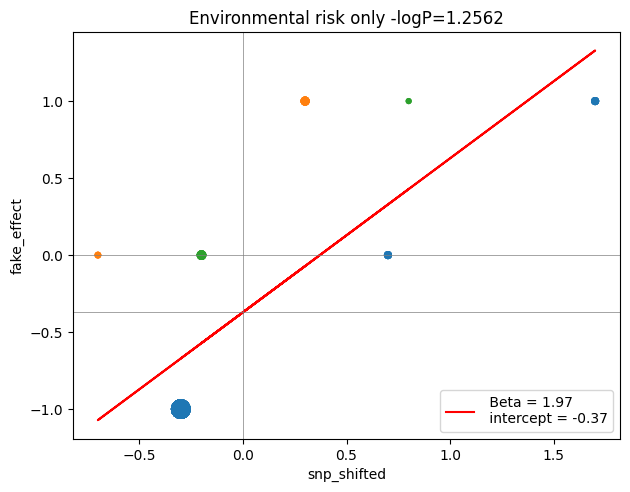

In [20]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp_shifted', y='fake_effect', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp_shifted'], humans['correcting_for_shift'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value_fake}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [21]:
humans['distances_from_fake_effect'] = humans['fake_effect'] - humans['correcting_for_shift']

# SNP shifted ENV

In [22]:
X = humans[['snp_shifted']]  # Predictor variable
y = humans['env_risk']    # Response variable
X = sm.add_constant(X)
# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp_shifted']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp_shifted']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk_env'] = model.predict(X)

-1.6653345369377348e-16


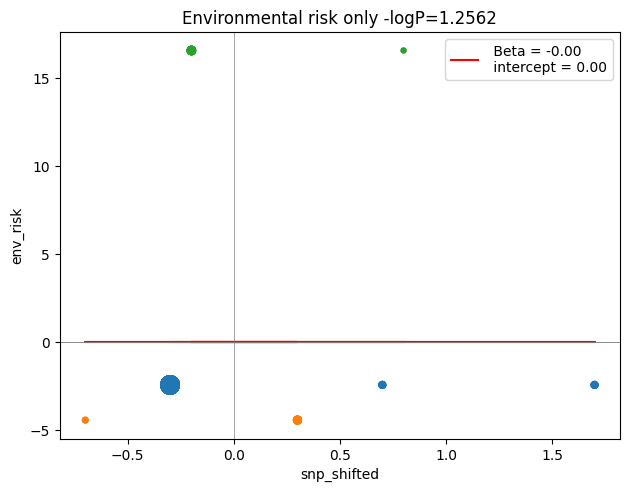

In [23]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp_shifted', y='env_risk', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp_shifted'], humans['predicted_risk_env'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value_fake}")
plt.legend()

# Show the plot
plt.show()
plt.close()

# residual

In [26]:
humans['env_only_predicted_popstrat'] = humans['env_risk'] - humans['predicted_risk_env']- humans['distances_from_fake_effect']*(beta/beta_fake)

In [27]:
humans

,snp_-1,snp_0,snp_1,snp,snp_nr,minaf,hetaf,majaf,pop,pop_quantity,env_risk,predicted_env_risk,snp_mean,snp_shifted,fake_effect,correcting_for_shift,distances_from_fake_effect,predicted_risk_env,env_only_predicted_risk,env_only_predicted_popstrat
0,1,0,0,-1,1.00,0.8,0.1,0.1,pop1,50,-2.428571,-1.235272,-0.7,-0.3,-1,-0.671429,-0.328571,8.271162e-16,-2.428571,-2.428571
1,1,0,0,-1,1.00,0.8,0.1,0.1,pop1,50,-2.428571,-1.235272,-0.7,-0.3,-1,-0.671429,-0.328571,8.271162e-16,-2.428571,-2.428571
2,1,0,0,-1,1.00,0.8,0.1,0.1,pop1,50,-2.428571,-1.235272,-0.7,-0.3,-1,-0.671429,-0.328571,8.271162e-16,-2.428571,-2.428571
3,1,0,0,-1,1.00,0.8,0.1,0.1,pop1,50,-2.428571,-1.235272,-0.7,-0.3,-1,-0.671429,-0.328571,8.271162e-16,-2.428571,-2.428571
4,1,0,0,-1,1.00,0.8,0.1,0.1,pop1,50,-2.428571,-1.235272,-0.7,-0.3,-1,-0.671429,-0.328571,8.271162e-16,-2.428571,-2.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,1,0,0,0.20,0.0,0.8,0.2,pop3,10,16.571429,0.729934,0.2,-0.2,0,-0.571429,0.571429,8.104628e-16,16.571429,16.571429
66,0,1,0,0,0.20,0.0,0.8,0.2,pop3,10,16.571429,0.729934,0.2,-0.2,0,-0.571429,0.571429,8.104628e-16,16.571429,16.571429
67,0,1,0,0,0.20,0.0,0.8,0.2,pop3,10,16.571429,0.729934,0.2,-0.2,0,-0.571429,0.571429,8.104628e-16,16.571429,16.571429
68,0,0,1,1,0.05,0.0,0.8,0.2,pop3,10,16.571429,2.695140,0.2,0.8,1,0.428571,0.571429,6.439294e-16,16.571429,16.571429


# Add effect

# No corr

In [28]:
effect = 0.5

In [29]:
humans['causal_risk'] = effect*humans['snp']

In [30]:
X = humans[['snp']]  # Predictor variable
y = humans['causal_risk']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk_causal'] = model.predict(X)

0.5


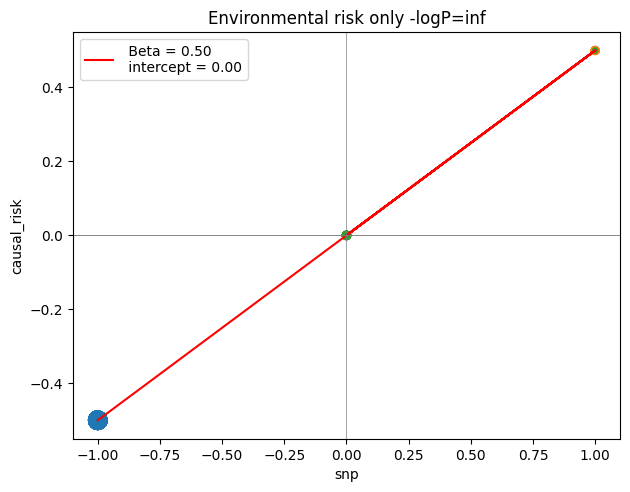

In [31]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp', y='causal_risk', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp'], humans['predicted_risk_causal'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

# X-X_mean

In [32]:
X = humans[['snp_shifted']]  # Predictor variable
y = humans['causal_risk']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp_shifted']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp_shifted']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk_causal'] = model.predict(X)


0.4999999999999999


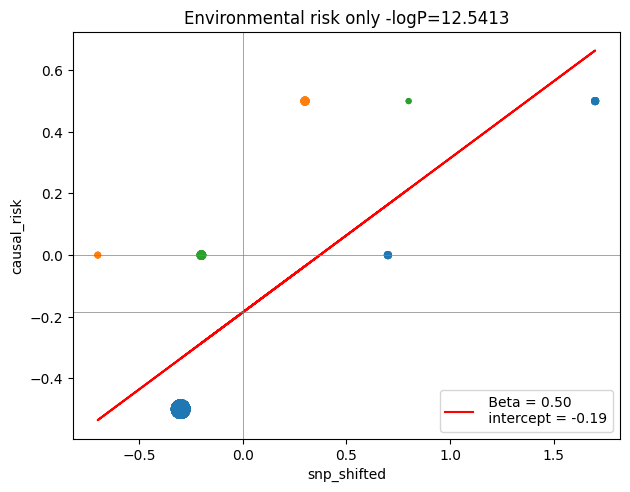

In [33]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp_shifted', y='causal_risk', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp_shifted'], humans['predicted_risk_causal'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

# Residual causal

In [36]:
humans['causal_only_predicted_popstrat'] = humans['causal_risk'] - humans['predicted_risk_causal'] - humans['distances_from_fake_effect']*(beta/beta_fake)

In [38]:
humans['causal_risk_corrected'] = humans['causal_risk']-humans['distances_from_fake_effect']*(beta/beta_fake)

In [39]:
humans

,snp_-1,snp_0,snp_1,snp,snp_nr,minaf,hetaf,majaf,pop,pop_quantity,...,fake_effect,correcting_for_shift,distances_from_fake_effect,predicted_risk_env,env_only_predicted_risk,env_only_predicted_popstrat,causal_risk,predicted_risk_causal,causal_only_predicted_popstrat,causal_risk_corrected
0,1,0,0,-1,1.00,0.8,0.1,0.1,pop1,50,...,-1,-0.671429,-0.328571,8.271162e-16,-2.428571,-2.428571,-0.5,-0.335714,0.0,-0.335714
1,1,0,0,-1,1.00,0.8,0.1,0.1,pop1,50,...,-1,-0.671429,-0.328571,8.271162e-16,-2.428571,-2.428571,-0.5,-0.335714,0.0,-0.335714
2,1,0,0,-1,1.00,0.8,0.1,0.1,pop1,50,...,-1,-0.671429,-0.328571,8.271162e-16,-2.428571,-2.428571,-0.5,-0.335714,0.0,-0.335714
3,1,0,0,-1,1.00,0.8,0.1,0.1,pop1,50,...,-1,-0.671429,-0.328571,8.271162e-16,-2.428571,-2.428571,-0.5,-0.335714,0.0,-0.335714
4,1,0,0,-1,1.00,0.8,0.1,0.1,pop1,50,...,-1,-0.671429,-0.328571,8.271162e-16,-2.428571,-2.428571,-0.5,-0.335714,0.0,-0.335714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,1,0,0,0.20,0.0,0.8,0.2,pop3,10,...,0,-0.571429,0.571429,8.104628e-16,16.571429,16.571429,0.0,-0.285714,0.0,-0.285714
66,0,1,0,0,0.20,0.0,0.8,0.2,pop3,10,...,0,-0.571429,0.571429,8.104628e-16,16.571429,16.571429,0.0,-0.285714,0.0,-0.285714
67,0,1,0,0,0.20,0.0,0.8,0.2,pop3,10,...,0,-0.571429,0.571429,8.104628e-16,16.571429,16.571429,0.0,-0.285714,0.0,-0.285714
68,0,0,1,1,0.05,0.0,0.8,0.2,pop3,10,...,1,0.428571,0.571429,6.439294e-16,16.571429,16.571429,0.5,0.214286,0.0,0.214286


In [40]:
X = humans[['snp_shifted']]  # Predictor variable
y = humans['causal_risk_corrected']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp_shifted']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp_shifted']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk_causal_corrected'] = model.predict(X)

0.49999999999999967


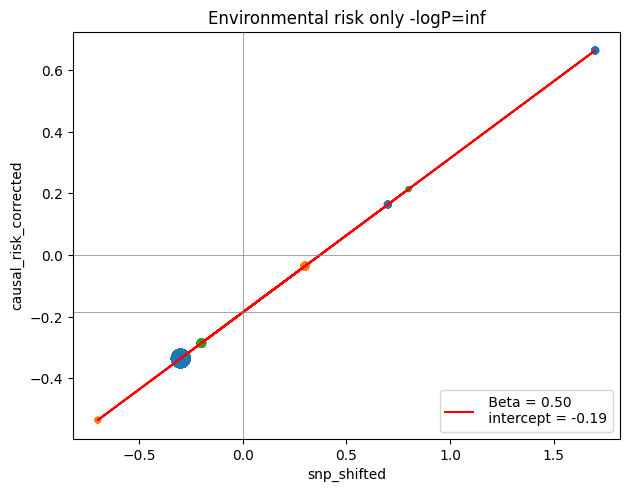

In [42]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp_shifted', y='causal_risk_corrected', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp_shifted'], humans['predicted_risk_causal_corrected'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

# Combinaison

In [43]:
effect = 2.1

In [44]:
humans['combi'] = humans['env_risk'] + effect*humans['snp']

# No correction

In [45]:
X = humans[['snp']]  # Predictor variable
y = humans['combi']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

4.0652061855670105


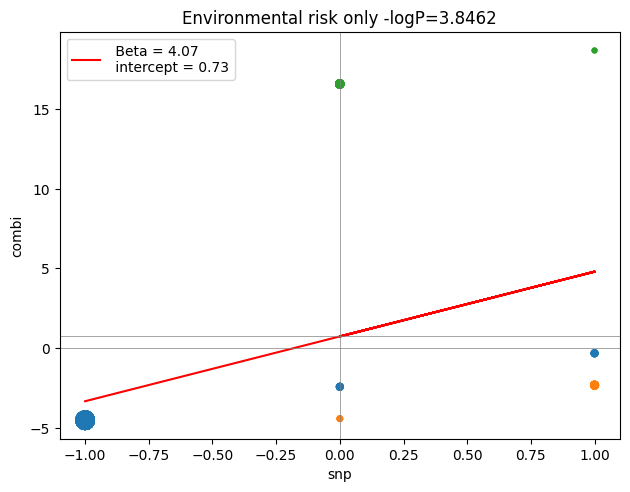

In [46]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp', y='combi', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

# SNP shifted

In [47]:
X = humans[['snp_shifted']]  # Predictor variable
y = humans['combi']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp_shifted']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp_shifted']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk_combi'] = model.predict(X)

2.0999999999999988


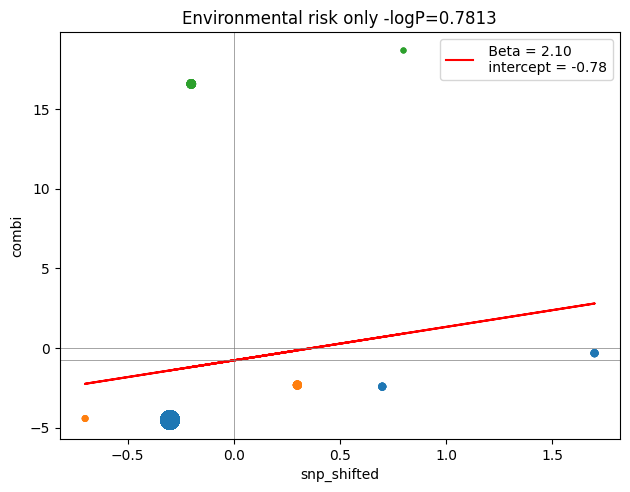

In [48]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp_shifted', y='combi', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp_shifted'], humans['predicted_risk_combi'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

# Residual Combi

In [57]:
humans['combi_predicted_popstrat'] = humans['combi'] - humans['predicted_risk_combi'] - humans['distances_from_fake_effect']*(beta/beta_fake)

In [58]:
humans['combi_risk_corrected'] = humans['combi']- humans['combi_predicted_popstrat']

In [60]:
X = humans[['snp']]  # Predictor variable
y = humans['combi_risk_corrected']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk_combi_corrected'] = model.predict(X)

2.0999999999999983


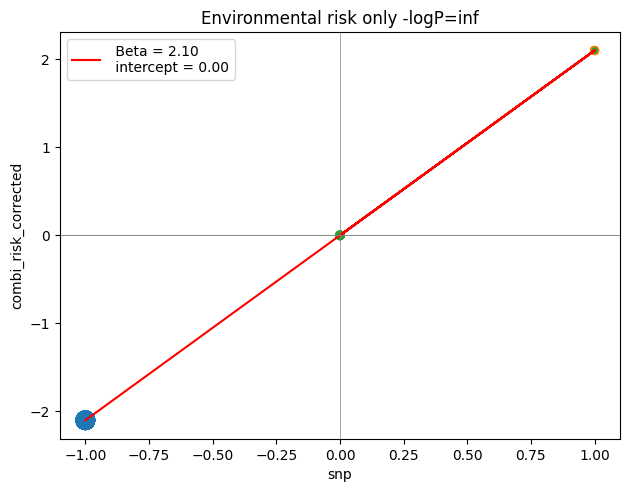

In [61]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp', y='combi_risk_corrected', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp'], humans['predicted_risk_combi_corrected'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [46]:
humans['combi_corrected'] = humans['combi']-(beta/beta_fake)*humans['correcting_for_shift']

In [47]:
X = humans[['snp_shifted']]  # Predictor variable
y = humans['combi_corrected']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp_shifted']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp_shifted']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk_combi_corrected'] = model.predict(X)

2.0999999999999988


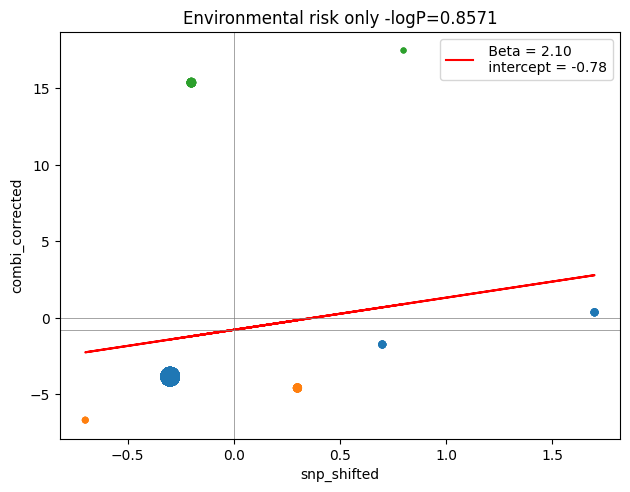

In [48]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp_shifted', y='combi_corrected', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp_shifted'], humans['predicted_risk_combi_corrected'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [50]:
humans['combi']-humans['predicted_risk_combi_corrected']

0     -3.118571
1     -3.118571
2     -3.118571
3     -3.118571
4     -3.118571
        ...    
65    17.771429
66    17.771429
67    17.771429
68    17.771429
69    17.771429
Length: 70, dtype: float64